# Transfer Learning with VGG16 for Image Classification

## Objective
Implement transfer learning using VGG16 for image classification on the CIFAR-10 dataset.

## Why CIFAR-10?
- Smaller dataset: 50,000 training images (vs 1.2M in ImageNet)
- Smaller image size: 32x32 (vs 224x224 in ImageNet)
- Faster training: Reduced computational requirements



# Transfer Learning with VGG16 for Image Classification

## Conceptual Overview of Transfer Learning

### What is Transfer Learning?
Transfer learning is a machine learning technique where a model trained on one task is reused as the starting point for a different but related task. Instead of training a model from scratch, we leverage the knowledge (weights) learned by a pre-trained model on a large dataset (e.g., ImageNet) and adapt it to a new, smaller dataset.

### Why Use Transfer Learning?
1. **Saves Time and Resources**: Training deep learning models from scratch requires massive computational power and time. Transfer learning allows us to reuse pre-trained models, significantly reducing training time.
2. **Works Well with Small Datasets**: When you have limited data, training a deep model from scratch can lead to overfitting. Transfer learning helps by leveraging features learned from a large dataset.
3. **State-of-the-Art Performance**: Pre-trained models like VGG16, ResNet, and BERT have already learned useful features from large datasets, making them highly effective for new tasks.

### How Does Transfer Learning Work?
1. **Pre-trained Model**: Start with a model trained on a large dataset (e.g., VGG16 trained on ImageNet).
2. **Feature Extraction**: Remove the final classification layer and use the remaining layers as a feature extractor.
3. **Fine-Tuning**: Optionally, unfreeze some layers and fine-tune the model on the new dataset to adapt it to the specific task.

### Models for Transfer Learning
- **VGG16**: A deep convolutional neural network with 16 layers, known for its simplicity and effectiveness.
- **ResNet**: Uses residual connections to enable training of very deep networks.
- **MobileNet**: Lightweight model optimized for mobile and embedded devices.
- **BERT**: A transformer-based model for natural language processing.

### Use Cases
- **Image Classification**: Adapting models like VGG16 or ResNet for custom image datasets.
- **Object Detection**: Using pre-trained models as feature extractors for detecting objects in images.
- **Text Classification**: Fine-tuning models like BERT for sentiment analysis or spam detection.

### Advantages
- **Reduced Training Time**: Leverages pre-trained weights, reducing the need for extensive training.
- **Better Performance**: Pre-trained models have already learned useful features, leading to better generalization.
- **Works with Small Datasets**: Effective even when the new dataset is small.

### Disadvantages
- **Domain Mismatch**: If the new dataset is very different from the pre-trained model's original dataset, performance may suffer.
- **Overfitting**: Fine-tuning too much on a small dataset can lead to overfitting.
- **Computational Cost**: Large models like VGG16 can still be computationally expensive.


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

### Explanation:
1. **Install TensorFlow**: We install the TensorFlow library, which provides the VGG16 model and other utilities.
2. **Import Libraries**:
   - `tensorflow`: The main deep learning framework.
   - `VGG16`: The pre-trained VGG16 model.
   - `layers` and `models`: For building and customizing neural networks.
   - `numpy`: For numerical operations.
   - `matplotlib.pyplot`: For plotting graphs and visualizations.
   - `confusion_matrix` and `classification_report`: For evaluating model performance.


In [3]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

print(f"Training images: {train_images.shape}")
print(f"Test images: {test_images.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training images: (50000, 32, 32, 3)
Test images: (10000, 32, 32, 3)


### Explanation:
1. **Load CIFAR-10 Dataset**:
   - `tf.keras.datasets.cifar10.load_data()` loads the CIFAR-10 dataset, which contains 50,000 training images and 10,000 test images.
   - Each image is 32x32 pixels with 3 color channels (RGB).
2. **Normalize Pixel Values**:
   - Divide pixel values by 255 to scale them to the range [0, 1]. This helps the model converge faster.
3. **One-Hot Encoding**:
   - Convert integer labels (0-9) to one-hot encoded vectors (e.g., `[0, 0, 1, 0, ...]`).
4. **Print Shapes**:
   - Check the shapes of the training and test datasets.


In [4]:
# Resize images to 48x48 (minimum input size for VGG16)
def resize_images(images):
    return tf.image.resize(images, [48, 48])

train_images = resize_images(train_images)
test_images = resize_images(test_images)

print(f"Resized training images: {train_images.shape}")
print(f"Resized test images: {test_images.shape}")

Resized training images: (50000, 48, 48, 3)
Resized test images: (10000, 48, 48, 3)



### Explanation:
1. **Resize Images**:
   - VGG16 requires a minimum input size of 48x48. We use `tf.image.resize` to resize the 32x32 CIFAR-10 images to 48x48.
2. **Apply Resizing**:
   - Resize both training and test images.
3. **Print Shapes**:
   - Verify that the images have been resized correctly.


In [5]:
# Load VGG16 without top layers (include_top=False)
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(48, 48, 3)
)

# Freeze VGG16 layers
base_model.trainable = False

# Add custom classification head
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Explanation:
1. **Load VGG16**:
   - `VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))` loads the VGG16 model pre-trained on ImageNet, excluding the top classification layer.
2. **Freeze Layers**:
   - Set `base_model.trainable = False` to freeze the VGG16 layers, preventing them from being updated during training.
3. **Add Custom Head**:
   - `Flatten()`: Flattens the output of VGG16 into a 1D vector.
   - `Dense(256, activation='relu')`: Adds a fully connected layer with 256 units and ReLU activation.
   - `Dropout(0.5)`: Adds dropout to prevent overfitting.
   - `Dense(10, activation='softmax')`: Adds the final classification layer with 10 units (for 10 classes) and softmax activation.
4. **Compile the Model**:
   - Use the Adam optimizer with a learning rate of 1e-4.
   - Use categorical cross-entropy loss for multi-class classification.
   - Track accuracy as the evaluation metric.
5. **Model Summary**:
   - Print a summary of the model architecture.



In [6]:
# Train only the custom head
history = model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    epochs=5,  # Reduced epochs for faster training
    batch_size=64
)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.2179 - loss: 2.1919 - val_accuracy: 0.4763 - val_loss: 1.5755
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.4417 - loss: 1.6020 - val_accuracy: 0.5239 - val_loss: 1.4206
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.4920 - loss: 1.4639 - val_accuracy: 0.5454 - val_loss: 1.3456
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5154 - loss: 1.4004 - val_accuracy: 0.5605 - val_loss: 1.3025
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.5327 - loss: 1.3500 - val_accuracy: 0.5676 - val_loss: 1.2701


### Explanation:
1. **Train the Model**:
   - `model.fit()` trains the model on the training data.
   - `train_images` and `train_labels` are the input data and labels.
   - `validation_data=(test_images, test_labels)` evaluates the model on the test data after each epoch.
   - `epochs=5`: Train for 5 epochs.
   - `batch_size=64`: Use a batch size of 64 for faster training.
2. **Phase 1**:
   - Only the custom classification head is trained, while the VGG16 layers remain frozen.



In [12]:
# Unfreeze top layers of VGG16
base_model.trainable = True

# Recompile with lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune for 2 epochs
history = model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    epochs=10,
    batch_size=64
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.8613 - loss: 0.4053 - val_accuracy: 0.8529 - val_loss: 0.4285
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.8929 - loss: 0.3155 - val_accuracy: 0.8563 - val_loss: 0.4158
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.9186 - loss: 0.2404 - val_accuracy: 0.8691 - val_loss: 0.3839
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.9357 - loss: 0.1931 - val_accuracy: 0.8752 - val_loss: 0.3779
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9511 - loss: 0.1447 - val_accuracy: 0.8744 - val_loss: 0.4034
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.9634 - loss: 0.1086 - val_accuracy: 0.8708 - val_loss: 0.4431
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.9706 - loss: 0.0859 - val_accuracy: 0.8684 - val_loss: 0.4604
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.9785 - loss: 0.0656 - 

### Explanation:
1. **Unfreeze VGG16 Layers**:
   - Set `base_model.trainable = True` to unfreeze the VGG16 layers for fine-tuning.
2. **Recompile the Model**:
   - Use a lower learning rate (1e-5) to avoid disrupting the pre-trained weights.
3. **Fine-Tune**:
   - Train the entire model (VGG16 + custom head) for 2 epochs.



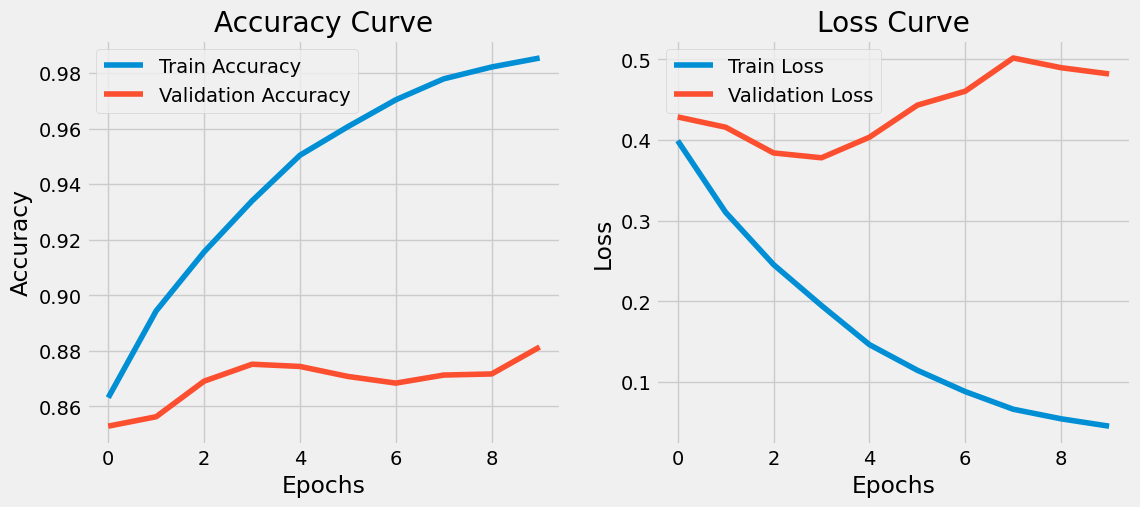

In [13]:
# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Explanation:
1. **Plot Accuracy**:
   - Plot training and validation accuracy over epochs.
2. **Plot Loss**:
   - Plot training and validation loss over epochs.
3. **Interpretation**:
   - A good model will show increasing accuracy and decreasing loss for both training and validation data.



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


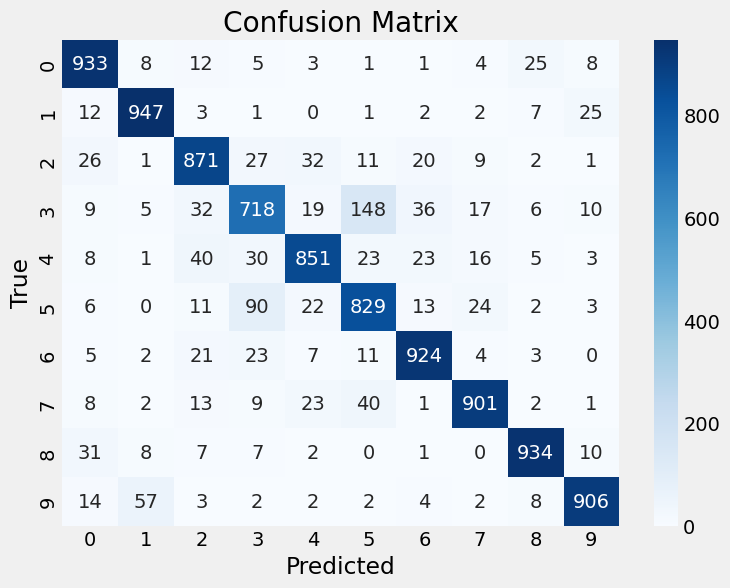

In [14]:
# Predict on test data
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Explanation:
1. **Predict Classes**:
   - Use the trained model to predict classes for the test images.
2. **Confusion Matrix**:
   - Compare predicted classes (`y_pred_classes`) with true classes (`y_true`).
   - Visualize the confusion matrix using a heatmap.


In [15]:
# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1000
           1       0.92      0.95      0.93      1000
           2       0.86      0.87      0.87      1000
           3       0.79      0.72      0.75      1000
           4       0.89      0.85      0.87      1000
           5       0.78      0.83      0.80      1000
           6       0.90      0.92      0.91      1000
           7       0.92      0.90      0.91      1000
           8       0.94      0.93      0.94      1000
           9       0.94      0.91      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



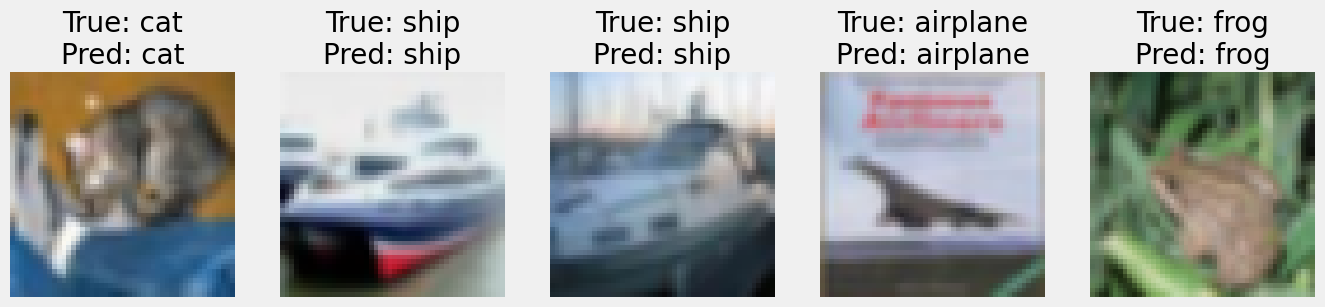

In [16]:
# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Predict on a few test images
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i])
    pred_class = class_names[y_pred_classes[i]]
    true_class = class_names[y_true[i]]
    plt.title(f"True: {true_class}\nPred: {pred_class}")
    plt.axis('off')
plt.show()


### Explanation:
1. **Class Names**:
   - Map class indices to human-readable names.
2. **Visualize Predictions**:
   - Display 5 test images with their true and predicted labels.
